<a href="https://colab.research.google.com/github/DevPedroLimaB/data_processing/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

urls = {
      "auditoria": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/auditorias.csv",
    "clientes": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/clientes.csv",
    "funcionarios": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/funcionarios.csv",
    "impostos": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/imposto.csv",
    "itens_nf": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/itens_nf.csv",
    "notas_fiscais": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/notas_fiscais.csv"
}

dfs = {}
for name, url in urls.items():
    try:
        df = pd.read_csv(url, on_bad_lines='skip')
        print(f"\nTratando {name} - Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

        df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

        for col in df.columns:
            if df[col].dtype in [np.float64, np.int64]:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna("Desconhecido")

        for col in df.columns:
            if 'data' in col:
                df[col] = pd.to_datetime(df[col], errors='coerce')

        dfs[name] = df
        display(df.head())

    except Exception as e:
        print(f"Erro ao carregar {name}: {e}")



Tratando auditoria - Linhas: 52, Colunas: 6


,id,nota_fiscal_id,auditor_id,data_auditoria,status,observacoes
0,1,1,1,2025-02-01,aprovada,Todos os valores corretos
1,2,2,2,2025-02-05,pendente,Verificar cálculo do ICMS
2,3,3,1,2025-02-10,reprovada,Documento incompleto
3,4,1,1,2025-01-16,aprovada,Todos os valores conferidos e corretos.
4,5,2,2,2025-01-17,pendente,Verificar cálculo do ICMS.



Tratando clientes - Linhas: 53, Colunas: 8


,id,nome,cnpj_cpf,endereco,cidade,estado,tipo_cliente,email
0,1,Empresa Alpha,12.345.678/0001-90,"Rua A, 100",Recife,PE,Pessoa Jurídica,contato@alpha.com
1,2,Empresa Beta,98.765.432/0001-10,"Av. B, 200",Olinda,PE,Pessoa Jurídica,financeiro@beta.com
2,3,João Silva,123.456.789-10,"Rua C, 300",Recife,PE,Pessoa Física,joao@email.com
3,367,Empresa Delta,22.333.444/0001-55,"Rua F, 101",Recife,PE,Pessoa Jurídica,contato@delta.com
4,368,Empresa Epsilon,33.444.555/0001-66,"Av. G, 202",Olinda,PE,Pessoa Jurídica,financeiro@epsilon.com



Tratando funcionarios - Linhas: 5, Colunas: 5


,id,nome,cargo,email,telefone
0,1,Pedro Auditor,Auditor,pedro@auditoria.com,81999999999
1,2,Ana Contadora,Contador,ana@auditoria.com,81988888888
2,3,Lucas Oliveira,Auditor,lucas@auditoria.com,81977777777
3,4,Carla Mendes,Contador,carla@auditoria.com,81966666666
4,5,Renato Silva,Auditor,renato@auditoria.com,81955555555


Erro ao carregar impostos: HTTP Error 404: Not Found

Tratando itens_nf - Linhas: 50, Colunas: 6


,id,nota_fiscal_id,descricao,quantidade,valor_unitario,valor_total
0,1,1,Serviço de Consultoria,1,1500.0,1500.0
1,2,2,Produto X,10,250.0,2500.0
2,3,3,Serviço de Auditoria,1,800.0,800.0
3,4,4,Produto Y,5,120.0,600.0
4,5,5,Serviço de Treinamento,2,950.0,1900.0



Tratando notas_fiscais - Linhas: 53, Colunas: 6


,id,cliente_id,numero_nf,data_emissao,valor_total,tipo
0,1,1,NF1001,2025-01-15,1500.0,saida
1,2,2,NF1002,2025-01-20,2500.0,saida
2,3,3,NF1003,2025-02-01,800.0,entrada
3,4,1,NF1001,2025-01-05,1200.0,saida
4,5,2,NF1002,2025-01-07,3400.0,saida


In [60]:
for name, df in dfs.items():
    print(f"\nValores faltantes - {name}:\n")
    display(df.isnull().sum())

    print(f"\nResumo estatístico - {name}:\n")
    display(df.describe(include='all'))



Valores faltantes - auditoria:



,0
id,0
nota_fiscal_id,0
auditor_id,0
data_auditoria,0
status,0
observacoes,0



Resumo estatístico - auditoria:



,id,nota_fiscal_id,auditor_id,data_auditoria,status,observacoes
count,3.0,3.0,3.000000,3,3,3
unique,NaN,NaN,NaN,NaN,3,3
top,NaN,NaN,NaN,NaN,aprovada,Todos os valores corretos
freq,NaN,NaN,NaN,NaN,1,1
mean,2.0,2.0,1.333333,2025-02-05 08:00:00,NaN,NaN
min,1.0,1.0,1.000000,2025-02-01 00:00:00,NaN,NaN
25%,1.5,1.5,1.000000,2025-02-03 00:00:00,NaN,NaN
50%,2.0,2.0,1.000000,2025-02-05 00:00:00,NaN,NaN
75%,2.5,2.5,1.500000,2025-02-07 12:00:00,NaN,NaN
max,3.0,3.0,2.000000,2025-02-10 00:00:00,NaN,NaN



Valores faltantes - clientes:



,0
id,0
nome,0
cnpj_cpf,0
endereco,0
cidade,0
estado,0
tipo_cliente,0
email,0



Resumo estatístico - clientes:



,id,nome,cnpj_cpf,endereco,cidade,estado,tipo_cliente,email
count,53.000000,53,53,53,53,53,53,53
unique,NaN,53,53,53,2,1,2,53
top,NaN,Empresa Alpha,12.345.678/0001-90,"Rua A, 100",Recife,PE,Pessoa Jurídica,contato@alpha.com
freq,NaN,1,1,1,28,53,27,1
mean,369.452830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,91.963949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,377.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,403.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores faltantes - funcionarios:



,0
id,0
nome,0
cargo,0
email,0
telefone,0



Resumo estatístico - funcionarios:



,id,nome,cargo,email,telefone
count,2.000000,2,2,2,2.000000e+00
unique,NaN,2,2,2,NaN
top,NaN,Pedro Auditor,Auditor,pedro@auditoria.com,NaN
freq,NaN,1,1,1,NaN
mean,1.500000,NaN,NaN,NaN,8.199444e+10
std,0.707107,NaN,NaN,NaN,7.856742e+06
min,1.000000,NaN,NaN,NaN,8.198889e+10
25%,1.250000,NaN,NaN,NaN,8.199167e+10
50%,1.500000,NaN,NaN,NaN,8.199444e+10
75%,1.750000,NaN,NaN,NaN,8.199722e+10



Valores faltantes - itens_nf:



,0
id,0
nota_fiscal_id,0
descricao,0
quantidade,0
valor_unitario,0
valor_total,0



Resumo estatístico - itens_nf:



,id,nota_fiscal_id,descricao,quantidade,valor_unitario,valor_total
count,50.00000,50.00000,50,50.000000,50.000000,50.000000
unique,NaN,NaN,50,NaN,NaN,NaN
top,NaN,NaN,Serviço de Consultoria,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN
mean,25.50000,25.50000,NaN,6.540000,784.060000,1324.480000
std,14.57738,14.57738,NaN,6.519077,879.416258,682.077895
min,1.00000,1.00000,NaN,1.000000,30.000000,525.000000
25%,13.25000,13.25000,NaN,1.000000,82.500000,828.750000
50%,25.50000,25.50000,NaN,4.000000,400.000000,1000.000000
75%,37.75000,37.75000,NaN,10.000000,1087.500000,1875.000000



Valores faltantes - notas_fiscais:



,0
id,0
cliente_id,0
numero_nf,0
data_emissao,0
valor_total,0
tipo,0



Resumo estatístico - notas_fiscais:



,id,cliente_id,numero_nf,data_emissao,valor_total,tipo
count,53.000000,53.000000,53,53,53.000000,53
unique,NaN,NaN,50,NaN,NaN,2
top,NaN,NaN,NF1001,NaN,NaN,saida
freq,NaN,NaN,2,NaN,NaN,35
mean,27.000000,1.981132,NaN,2025-03-27 14:29:26.037735936,2533.962264,NaN
min,1.000000,1.000000,NaN,2025-01-05 00:00:00,500.000000,NaN
25%,14.000000,1.000000,NaN,2025-02-12 00:00:00,1200.000000,NaN
50%,27.000000,2.000000,NaN,2025-03-27 00:00:00,2600.000000,NaN
75%,40.000000,3.000000,NaN,2025-05-09 00:00:00,3600.000000,NaN
max,53.000000,3.000000,NaN,2025-06-20 00:00:00,4900.000000,NaN


Dados carregados:


,id,cliente_id,numero_nf,data_emissao,valor_total,tipo
0,1,1,NF1001,2025-01-15,1500.0,saida
1,2,2,NF1002,2025-01-20,2500.0,saida
2,3,3,NF1003,2025-02-01,800.0,entrada
3,4,1,NF1001,2025-01-05,1200.0,saida
4,5,2,NF1002,2025-01-07,3400.0,saida



 Totais por tipo de operação (entrada/saída):


,valor_total
tipo,
entrada,18950.0
saida,115350.0


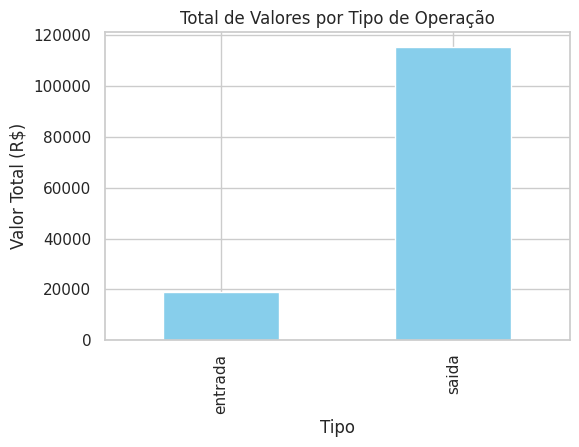

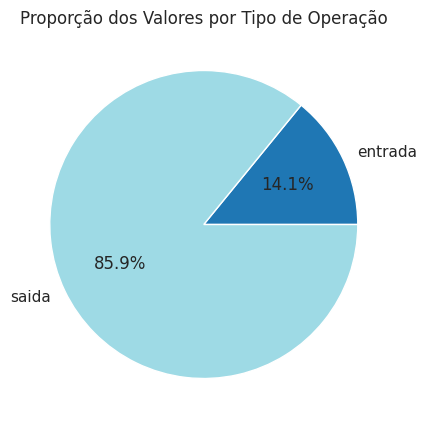

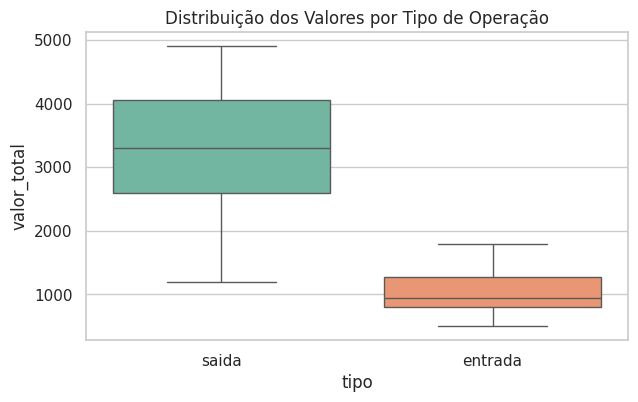

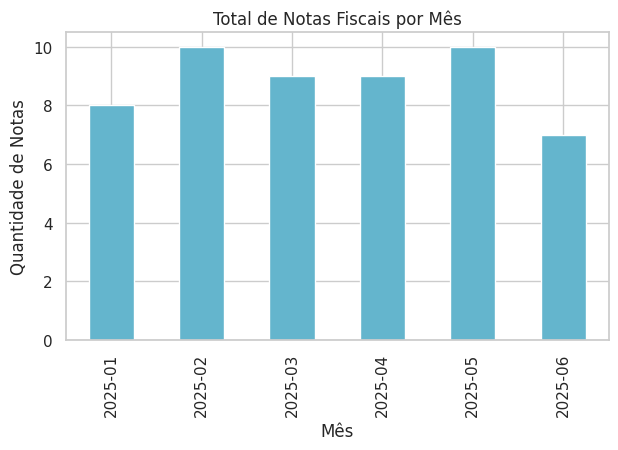

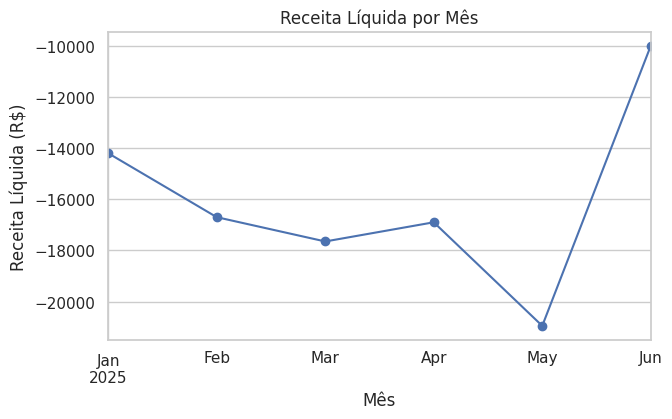

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_nf = "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/notas_fiscais.csv"

nf = pd.read_csv(url_nf, sep=",", parse_dates=['data_emissao'])

print("Dados carregados:")
display(nf.head())

nf['valor_total'] = pd.to_numeric(nf['valor_total'], errors='coerce')


nf['mes'] = nf['data_emissao'].dt.to_period('M')

print("\n Totais por tipo de operação (entrada/saída):")
totais_tipo = nf.groupby("tipo")['valor_total'].sum()
display(totais_tipo)

plt.figure(figsize=(6,4))
totais_tipo.plot(kind='bar', color='skyblue')
plt.title("Total de Valores por Tipo de Operação")
plt.xlabel("Tipo")
plt.ylabel("Valor Total (R$)")
plt.show()

plt.figure(figsize=(5,5))
totais_tipo.plot(kind='pie', autopct='%1.1f%%', colormap="tab20")
plt.title("Proporção dos Valores por Tipo de Operação")
plt.ylabel("")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x="tipo", y="valor_total", hue="tipo", data=nf, palette="Set2", legend=False)
plt.title("Distribuição dos Valores por Tipo de Operação")
plt.show()

plt.figure(figsize=(7,4))
notas_por_mes = nf.groupby('mes')['id'].count()
notas_por_mes.plot(kind='bar', color='c')
plt.title("Total de Notas Fiscais por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Notas")
plt.show()

nf['receita_liquida'] = nf.apply(
    lambda row: row['valor_total'] if row['tipo'] == 'entrada' else -row['valor_total'],
    axis=1
)

receita_mensal = nf.groupby('mes')['receita_liquida'].sum()

plt.figure(figsize=(7,4))
receita_mensal.plot(marker="o")
plt.title("Receita Líquida por Mês")
plt.xlabel("Mês")
plt.ylabel("Receita Líquida (R$)")
plt.grid(True)
plt.show()


In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

urls = {
    "auditoria": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/auditorias.csv",
    "clientes": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/clientes.csv",
    "funcionarios": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/funcionarios.csv",
    "impostos": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/impostos.csv",
    "itens_nf": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/itens_nf.csv",
    "notas_fiscais": "https://raw.githubusercontent.com/DevPedroLimaB/data_processing/main/notas_fiscais.csv"
}

auditoria = pd.read_csv(urls["auditoria"])
clientes = pd.read_csv(urls["clientes"])
funcionarios = pd.read_csv(urls["funcionarios"])
impostos = pd.read_csv(urls["impostos"])
itens_nf = pd.read_csv(urls["itens_nf"])
notas_fiscais = pd.read_csv(urls["notas_fiscais"])


if 'data_emissao' in notas_fiscais.columns:
    notas_fiscais['data_emissao'] = pd.to_datetime(notas_fiscais['data_emissao'], errors='coerce')

if 'data_auditoria' in auditoria.columns:
    auditoria['data_auditoria'] = pd.to_datetime(auditoria['data_auditoria'], errors='coerce')


auditoria = auditoria.drop_duplicates()
clientes = clientes.drop_duplicates()
funcionarios = funcionarios.drop_duplicates()
impostos = impostos.drop_duplicates()
itens_nf = itens_nf.drop_duplicates()
notas_fiscais = notas_fiscais.drop_duplicates(subset=['numero_nf'])


if 'desconto' in notas_fiscais.columns:
    notas_fiscais['desconto'] = notas_fiscais['desconto'].fillna(0)


itens_nf['descricao'] = itens_nf['descricao'].str.strip().str.title()


def resumo(df, nome):
    print(f"===== {nome} =====")
    display(df.head())
    print(df.info())
    print(df.describe())
    print("\n")

for df, nome in zip([auditoria, clientes, funcionarios, impostos, itens_nf, notas_fiscais],
                    ["Auditoria", "Clientes", "Funcionários", "Impostos", "Itens NF", "Notas Fiscais"]):
    resumo(df, nome)


faturamento_clientes = notas_fiscais.groupby('cliente_id')['valor_total'].sum().sort_values(ascending=False)
top_clientes = faturamento_clientes.head(10)
fig = px.bar(top_clientes, x=top_clientes.values, y=top_clientes.index,
             orientation='h', color=top_clientes.values,
             labels={'x':'Faturamento Total', 'y':'ID Cliente'},
             title="Top 10 Clientes por Faturamento")
fig.show()

notas_fiscais['mes'] = notas_fiscais['data_emissao'].dt.to_period('M')
receita_mensal = notas_fiscais.groupby('mes')['valor_total'].sum()
fig = px.line(x=receita_mensal.index.astype(str), y=receita_mensal.values, markers=True,
              labels={'x':'Mês', 'y':'Valor Total'}, title="Receita Mensal")
fig.show()


top_itens = itens_nf.groupby('descricao')['quantidade'].sum().sort_values(ascending=False).head(10)
fig = px.bar(top_itens, x=top_itens.values, y=top_itens.index,
             orientation='h', color=top_itens.values,
             labels={'x':'Quantidade Total', 'y':'Descrição'},
             title="Top 10 Produtos/Serviços Vendidos")
fig.show()


top_impostos = impostos.groupby('tipo_imposto')['valor'].sum().sort_values(ascending=False)
fig = px.pie(values=top_impostos.values, names=top_impostos.index, title="Distribuição de Impostos")
fig.show()


notas_invalidas = notas_fiscais[notas_fiscais['valor_total'] <= 0]
print("\n===== Notas Inválidas =====")
display(notas_invalidas)


clientes_sem_notas = clientes[~clientes['id'].isin(notas_fiscais['cliente_id'])]
print("\n===== Clientes sem Notas =====")
display(clientes_sem_notas)


print("\n===== Estatísticas Gerais =====")
for df, nome in zip([auditoria, clientes, funcionarios, impostos, itens_nf, notas_fiscais],
                    ["Auditoria", "Clientes", "Funcionários", "Impostos", "Itens NF", "Notas Fiscais"]):
    print(f"{nome}: Linhas={len(df)}, Colunas={len(df.columns)}")


===== Auditoria =====


,id,nota_fiscal_id,auditor_id,data_auditoria,status,observacoes
0,1,1,1,2025-02-01,aprovada,Todos os valores corretos
1,2,2,2,2025-02-05,pendente,Verificar cálculo do ICMS
2,3,3,1,2025-02-10,reprovada,Documento incompleto
3,4,1,1,2025-01-16,aprovada,Todos os valores conferidos e corretos.
4,5,2,2,2025-01-17,pendente,Verificar cálculo do ICMS.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              52 non-null     int64         
 1   nota_fiscal_id  52 non-null     int64         
 2   auditor_id      52 non-null     int64         
 3   data_auditoria  52 non-null     datetime64[ns]
 4   status          52 non-null     object        
 5   observacoes     52 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.6+ KB
None
              id  nota_fiscal_id  auditor_id                 data_auditoria
count  52.000000       52.000000   52.000000                             52
mean   26.500000       23.673077    1.480769  2025-02-08 18:55:23.076923136
min     1.000000        1.000000    1.000000            2025-01-16 00:00:00
25%    13.750000       10.750000    1.000000            2025-01-28 18:00:00
50%    26.500000       23.50

,id,nome,cnpj_cpf,endereco,cidade,estado,tipo_cliente,email
0,1,Empresa Alpha,12.345.678/0001-90,"Rua A, 100",Recife,PE,Pessoa Jurídica,contato@alpha.com
1,2,Empresa Beta,98.765.432/0001-10,"Av. B, 200",Olinda,PE,Pessoa Jurídica,financeiro@beta.com
2,3,João Silva,123.456.789-10,"Rua C, 300",Recife,PE,Pessoa Física,joao@email.com
3,367,Empresa Delta,22.333.444/0001-55,"Rua F, 101",Recife,PE,Pessoa Jurídica,contato@delta.com
4,368,Empresa Epsilon,33.444.555/0001-66,"Av. G, 202",Olinda,PE,Pessoa Jurídica,financeiro@epsilon.com


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            53 non-null     int64 
 1   nome          53 non-null     object
 2   cnpj_cpf      53 non-null     object
 3   endereco      53 non-null     object
 4   cidade        53 non-null     object
 5   estado        53 non-null     object
 6   tipo_cliente  53 non-null     object
 7   email         53 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.4+ KB
None
               id
count   53.000000
mean   369.452830
std     91.963949
min      1.000000
25%    377.000000
50%    390.000000
75%    403.000000
max    416.000000


===== Funcionários =====


,id,nome,cargo,email,telefone
0,1,Pedro Auditor,Auditor,pedro@auditoria.com,81999999999
1,2,Ana Contadora,Contador,ana@auditoria.com,81988888888
2,3,Lucas Oliveira,Auditor,lucas@auditoria.com,81977777777
3,4,Carla Mendes,Contador,carla@auditoria.com,81966666666
4,5,Renato Silva,Auditor,renato@auditoria.com,81955555555


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5 non-null      int64 
 1   nome      5 non-null      object
 2   cargo     5 non-null      object
 3   email     5 non-null      object
 4   telefone  5 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes
None
             id      telefone
count  5.000000  5.000000e+00
mean   3.000000  8.197778e+10
std    1.581139  1.756821e+07
min    1.000000  8.195556e+10
25%    2.000000  8.196667e+10
50%    3.000000  8.197778e+10
75%    4.000000  8.198889e+10
max    5.000000  8.200000e+10


===== Impostos =====


,id,nota_fiscal_id,tipo_imposto,aliquota,valor
0,1,1,ISS,5.00,75.0
1,2,2,ICMS,18.00,450.0
2,3,3,PIS,1.65,13.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3 non-null      int64  
 1   nota_fiscal_id  3 non-null      int64  
 2   tipo_imposto    3 non-null      object 
 3   aliquota        3 non-null      float64
 4   valor           3 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 252.0+ bytes
None
        id  nota_fiscal_id   aliquota       valor
count  3.0             3.0   3.000000    3.000000
mean   2.0             2.0   8.216667  179.400000
std    1.0             1.0   8.636598  236.374872
min    1.0             1.0   1.650000   13.200000
25%    1.5             1.5   3.325000   44.100000
50%    2.0             2.0   5.000000   75.000000
75%    2.5             2.5  11.500000  262.500000
max    3.0             3.0  18.000000  450.000000


===== Itens NF =====


,id,nota_fiscal_id,descricao,quantidade,valor_unitario,valor_total
0,1,1,Serviço De Consultoria,1,1500.0,1500.0
1,2,2,Produto X,10,250.0,2500.0
2,3,3,Serviço De Auditoria,1,800.0,800.0
3,4,4,Produto Y,5,120.0,600.0
4,5,5,Serviço De Treinamento,2,950.0,1900.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50 non-null     int64  
 1   nota_fiscal_id  50 non-null     int64  
 2   descricao       50 non-null     object 
 3   quantidade      50 non-null     int64  
 4   valor_unitario  50 non-null     float64
 5   valor_total     50 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB
None
             id  nota_fiscal_id  quantidade  valor_unitario  valor_total
count  50.00000        50.00000   50.000000       50.000000    50.000000
mean   25.50000        25.50000    6.540000      784.060000  1324.480000
std    14.57738        14.57738    6.519077      879.416258   682.077895
min     1.00000         1.00000    1.000000       30.000000   525.000000
25%    13.25000        13.25000    1.000000       82.500000   828.750000
50%    25.50000        25.50000  

,id,cliente_id,numero_nf,data_emissao,valor_total,tipo
0,1,1,NF1001,2025-01-15,1500.0,saida
1,2,2,NF1002,2025-01-20,2500.0,saida
2,3,3,NF1003,2025-02-01,800.0,entrada
6,7,1,NF1004,2025-01-15,2750.0,saida
7,8,2,NF1005,2025-01-20,4600.0,saida


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 52
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            50 non-null     int64         
 1   cliente_id    50 non-null     int64         
 2   numero_nf     50 non-null     object        
 3   data_emissao  50 non-null     datetime64[ns]
 4   valor_total   50 non-null     float64       
 5   tipo          50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.7+ KB
None
              id  cliente_id         data_emissao  valor_total
count  50.000000   50.000000                   50    50.000000
mean   28.320000    1.980000  2025-04-01 08:38:24  2578.000000
min     1.000000    1.000000  2025-01-15 00:00:00   500.000000
25%    16.250000    1.000000  2025-02-18 18:00:00  1325.000000
50%    28.500000    2.000000  2025-04-02 12:00:00  2600.000000
75%    40.750000    3.000000  2025-05-1


===== Notas Inválidas =====


,id,cliente_id,numero_nf,data_emissao,valor_total,tipo,mes



===== Clientes sem Notas =====


,id,nome,cnpj_cpf,endereco,cidade,estado,tipo_cliente,email
3,367,Empresa Delta,22.333.444/0001-55,"Rua F, 101",Recife,PE,Pessoa Jurídica,contato@delta.com
4,368,Empresa Epsilon,33.444.555/0001-66,"Av. G, 202",Olinda,PE,Pessoa Jurídica,financeiro@epsilon.com
5,369,Empresa Zeta,94.555.666/0001-77,"Rua H, 303",Recife,PE,Pessoa Jurídica,contato@zeta.com
6,370,Carlos Pereira,234.567.890-11,"Rua I, 404",Recife,PE,Pessoa Física,carlos@email.com
7,371,Fernanda Lima,345.678.901-22,"Av. J, 505",Olinda,PE,Pessoa Física,fernanda@email.com
8,372,Empresa Eta,55.666.777/0001-88,"Rua K, 606",Recife,PE,Pessoa Jurídica,contato@eta.com
9,373,Empresa Theta,66.777.888/0001-99,"Av. L, 707",Olinda,PE,Pessoa Jurídica,financeiro@theta.com
10,374,Rafael Costa,456.789.012-33,"Rua M, 808",Recife,PE,Pessoa Física,rafael@email.com
11,375,Patricia Mendes,567.890.123-44,"Av. N, 909",Olinda,PE,Pessoa Física,patricia@email.com
12,376,Empresa Iota,77.888.999/0001-11,"Rua O, 1010",Recife,PE,Pessoa Jurídica,contato@iota.com



===== Estatísticas Gerais =====
Auditoria: Linhas=52, Colunas=6
Clientes: Linhas=53, Colunas=8
Funcionários: Linhas=5, Colunas=5
Impostos: Linhas=3, Colunas=5
Itens NF: Linhas=50, Colunas=6
Notas Fiscais: Linhas=50, Colunas=7
